# Предсказание подходящего препарата через Дерево Решений

Имеются данные о группе пациентов, все из которых страдали одним и тем же заболеванием. Во время курса лечения каждый пациент реагировал на одно из 5 лекарств: препарат А, препарат В, препарат C, препарат X и Y.

Часть вашей работы состоит в том, чтобы построить модель, чтобы выяснить, какое лекарство может быть подходящим для будущего пациента с таким же заболеванием. Особенностями этого набора данных являются возраст, пол, артериальное давление и уровень холестерина пациентов, а целью является препарат, на который отреагировал каждый пациент.

In [168]:
import pandas as pd
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
data = pd.read_csv('drug200.csv')

In [170]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [171]:
data.shape

(200, 6)

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [173]:
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [174]:
len(data.columns)

6

In [175]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [176]:
data.Drug.unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [177]:
len(data.Drug.unique())

5

In [178]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [179]:
X = data.drop(['Drug'], axis=1)
y = data['Drug']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [180]:
X_train.shape, X_test.shape

((160, 5), (40, 5))

In [181]:
X_train.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
dtype: object

In [182]:
X_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K
79,32,F,LOW,NORMAL,10.840
197,52,M,NORMAL,HIGH,9.894
38,39,F,NORMAL,NORMAL,9.709
24,33,F,LOW,HIGH,33.486
122,34,M,NORMAL,HIGH,22.456


In [183]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Sex', 'BP', 'Cholesterol'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [184]:
X_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K
79,32,1,1,1,10.840
197,52,2,2,2,9.894
38,39,1,2,1,9.709
24,33,1,1,2,33.486
122,34,2,2,2,22.456


In [185]:
X_test.head()

,Age,Sex,BP,Cholesterol,Na_to_K
95,36,2,1,1,11.424
15,16,1,3,1,15.516
30,18,1,2,1,8.750
158,59,1,1,2,10.444
128,47,2,1,1,33.542


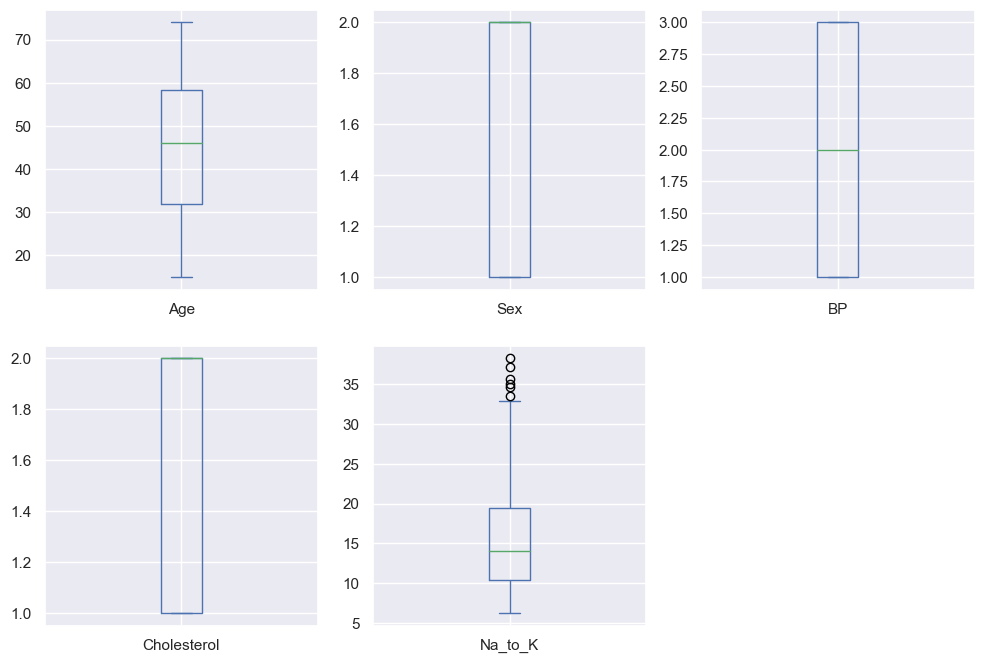

In [186]:
X_train.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False, figsize=(12,8))
plt.show()

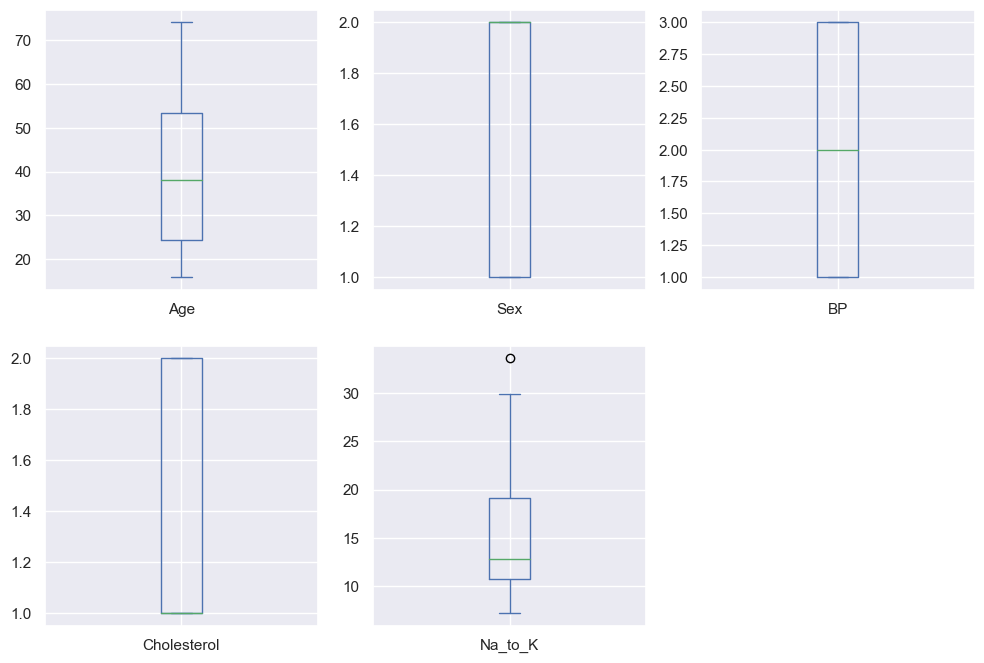

In [187]:
X_test.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False,  figsize=(12,8))
plt.show()

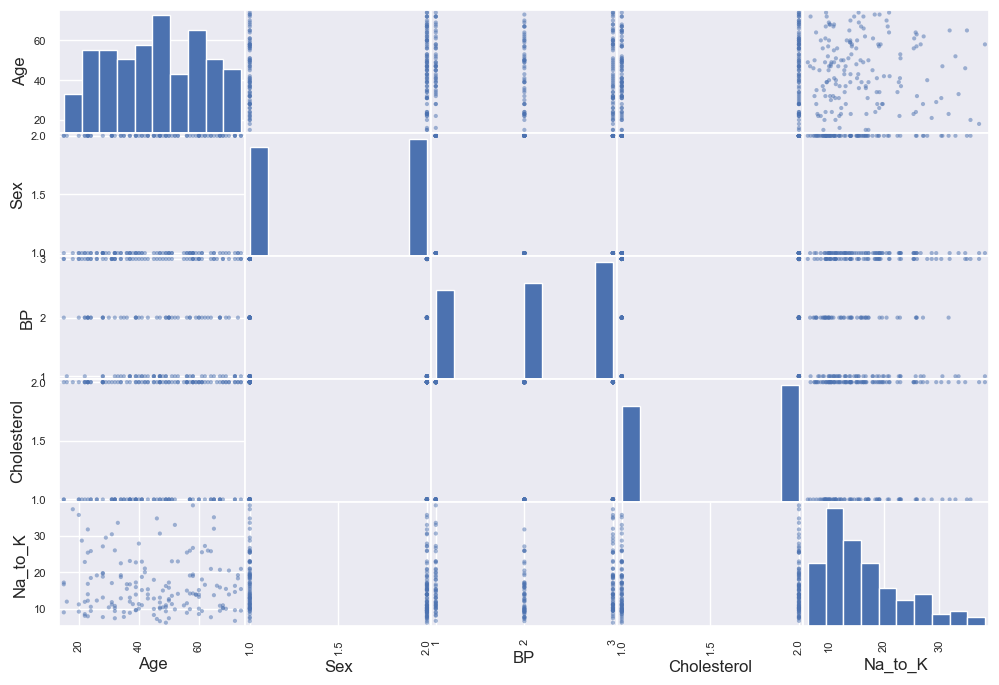

In [188]:
from pandas.plotting import scatter_matrix
scatter_matrix(X_train, figsize=(12,8))
plt.show()

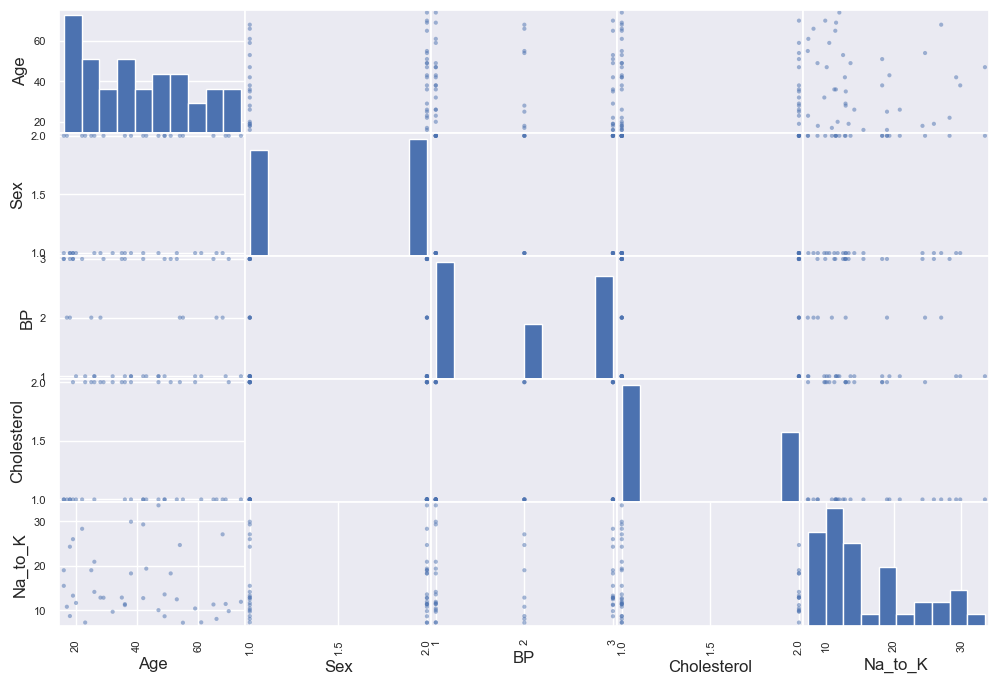

In [189]:
from pandas.plotting import scatter_matrix
scatter_matrix(X_test, figsize=(12,8))
plt.show()

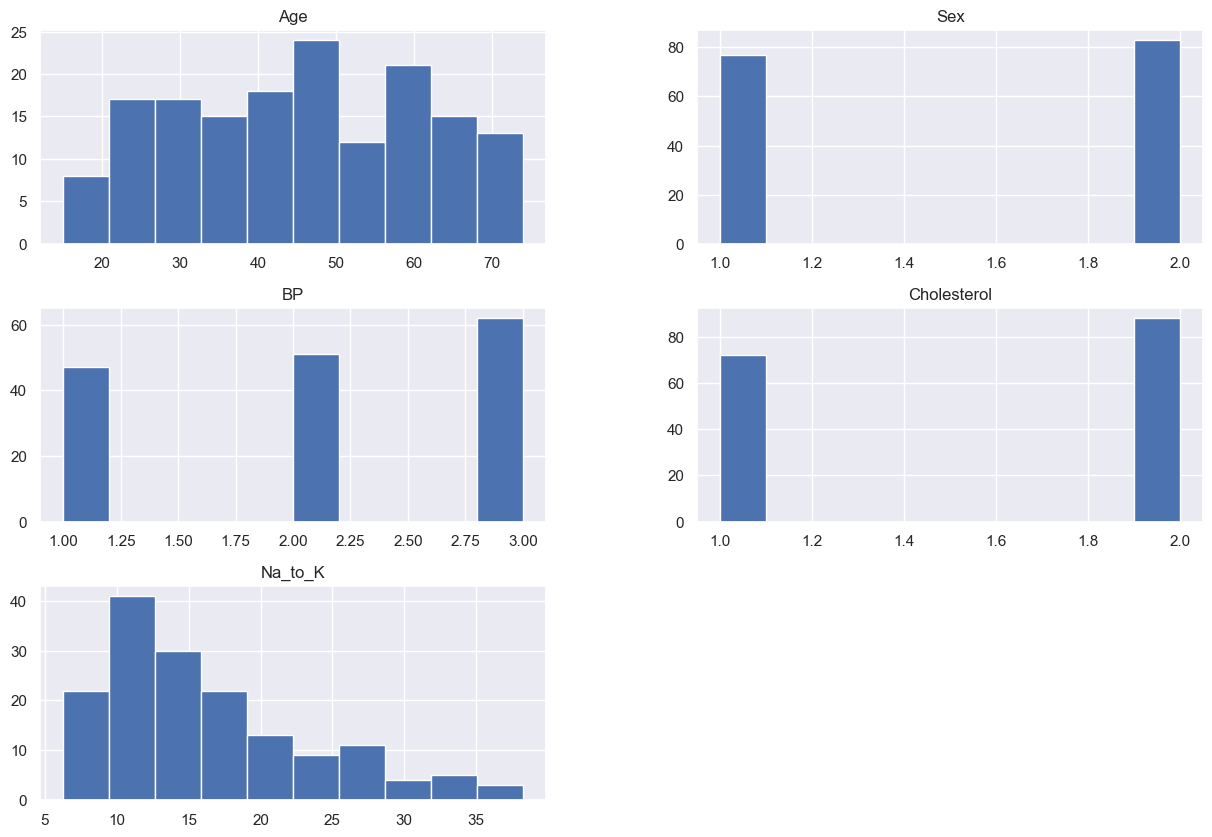

In [190]:
X_train.hist(figsize=(15,10))
plt.show()

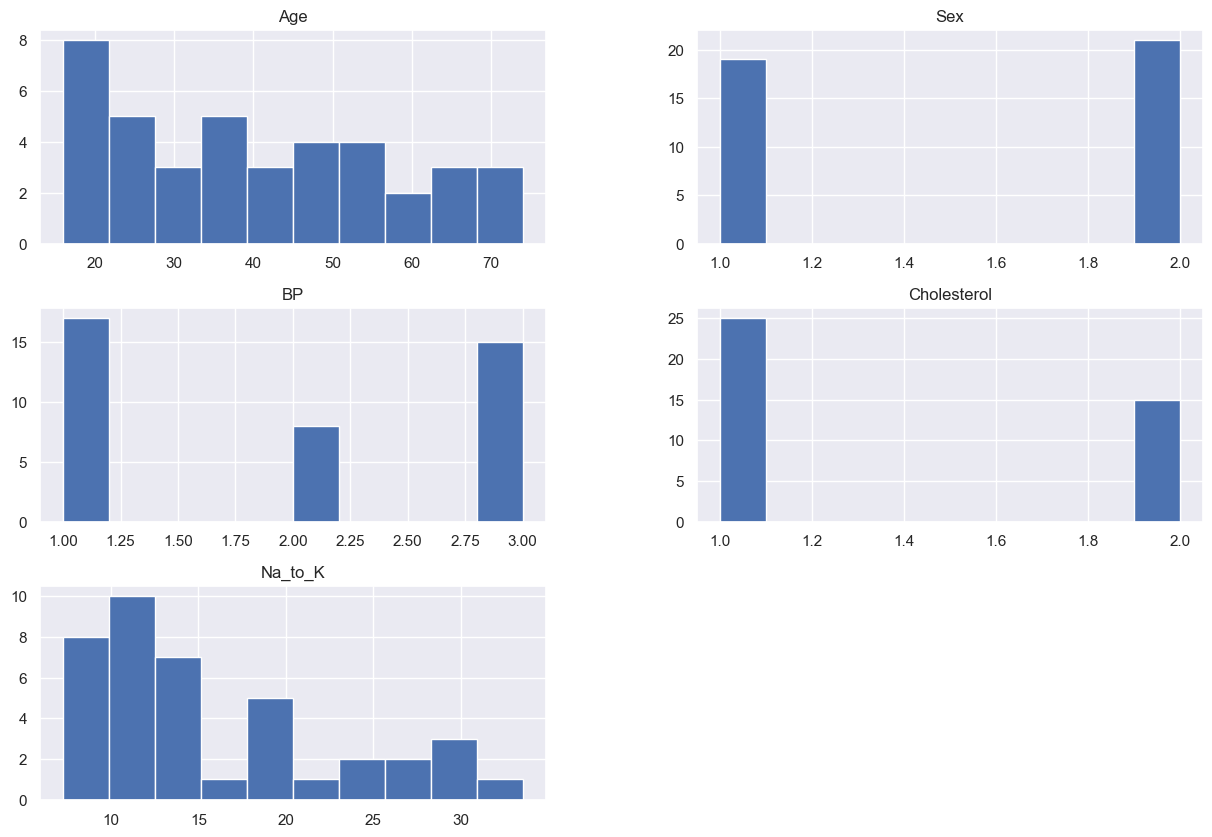

In [191]:
X_test.hist(figsize=(15,10))
plt.show()

## Gini

In [192]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
from sklearn.metrics import accuracy_score

In [193]:
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))
y_pred_train_gini = clf_gini.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train_gini)))
from sklearn import tree

Model accuracy score with criterion gini index: 0.8750
Training-set accuracy score: 0.9313


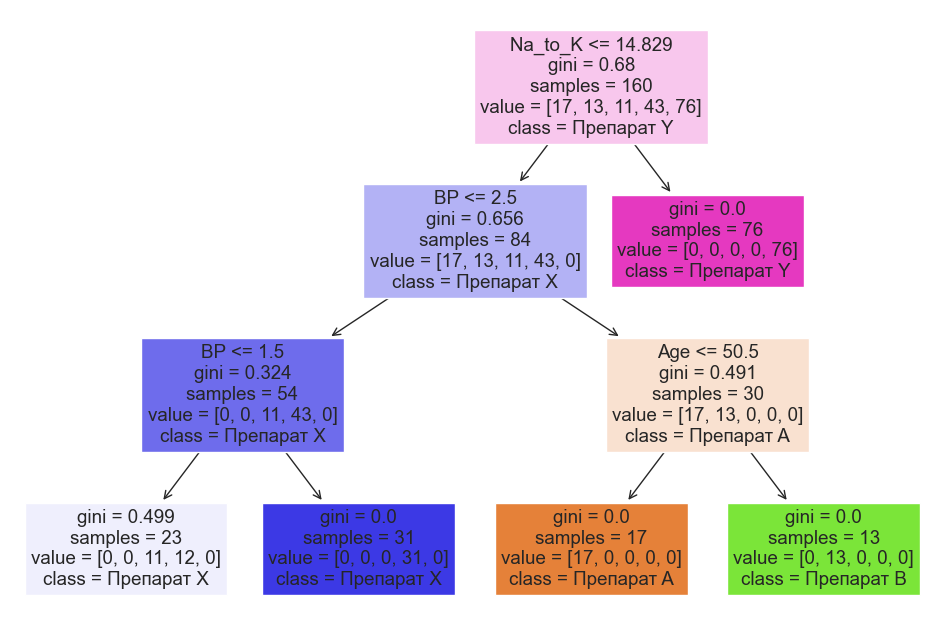

In [194]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini.fit(X_train, y_train))
plot_tree(clf_gini, feature_names=X.columns,
          class_names=['Препарат A', "Препарат B", "Препарат C", "Препарат X", "Препарат Y"], filled=True);

## Entropy

In [195]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
y_pred_train_en = clf_en.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Model accuracy score with criterion entropy: 0.8750
Training-set accuracy score: 0.9313


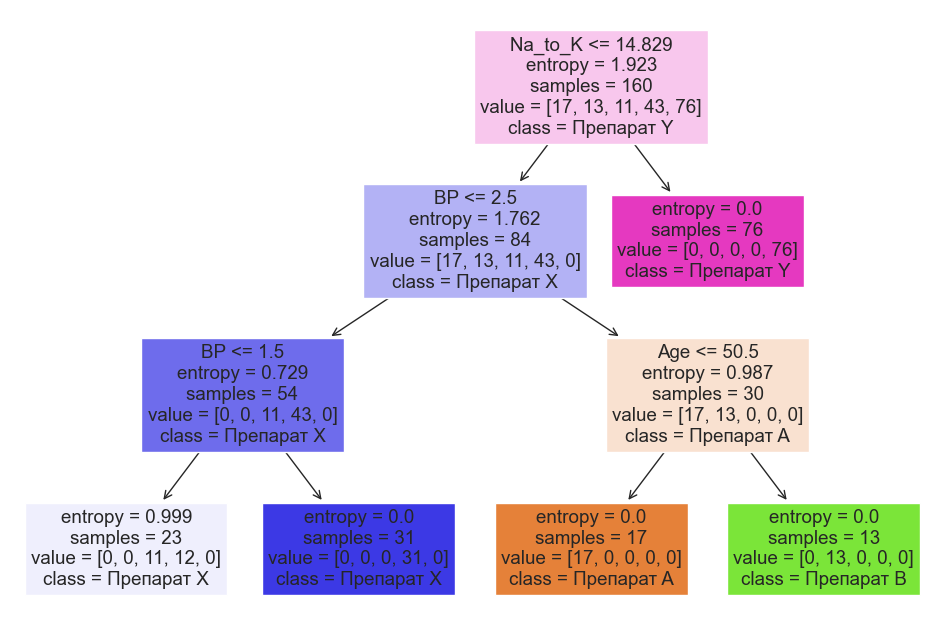

In [196]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train))
plot_tree(clf_en, feature_names = X.columns, class_names=['Препарат A', "Препарат B", "Препарат C", "Препарат X", "Препарат Y"], filled=True);

In [197]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_en)

array([[ 6,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  0,  5,  0],
       [ 0,  0,  0, 11,  0],
       [ 0,  0,  0,  0, 15]], dtype=int64)

In [198]:
if accuracy_score(y_test, y_pred_gini) > accuracy_score(y_train, y_pred_train_en):
   print("Gini Index Criterion is Better and it has accuracy equal to ", accuracy_score(y_test, y_pred_gini)*100)
else:
    print("Entropy Criterion is Better and it has accuracy equal to ", accuracy_score(y_train, y_pred_train_en)*100)

Entropy Criterion is Better and it has accuracy equal to  93.125


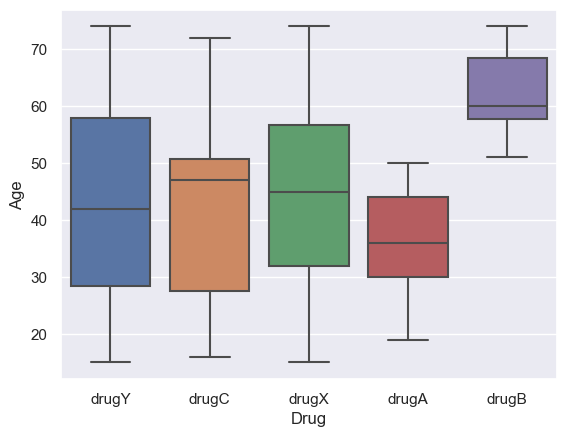

In [199]:
sns.set_theme(style="darkgrid")
sns.boxplot(x= "Drug", y="Age", data = data)
plt.show()